In [14]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.



In [15]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marib\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
import pandas as pd
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/wine-reviews/wine-rev.csv")
d.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [17]:
header = ['country', 'description', 'variety']
d.to_csv('solo-rev.csv', columns = header)
e = pd.read_csv('solo-rev.csv')
e.head(4)

,Unnamed: 0,country,description,variety
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Riesling


In [18]:
e.drop(e.columns[[0]], axis=1, inplace=True)
e.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


In [19]:
e['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [20]:
e.to_csv('s-rev.csv', index=False)
read = pd.read_csv('s-rev.csv')
read.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


In [22]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
pr = pd.read_csv('rev-solo.csv', header = None)
pr.head(3)

,0,1,2
0,Aromas include tropical fruit broom brimstone ...,Italy,White Blend
1,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
2,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris


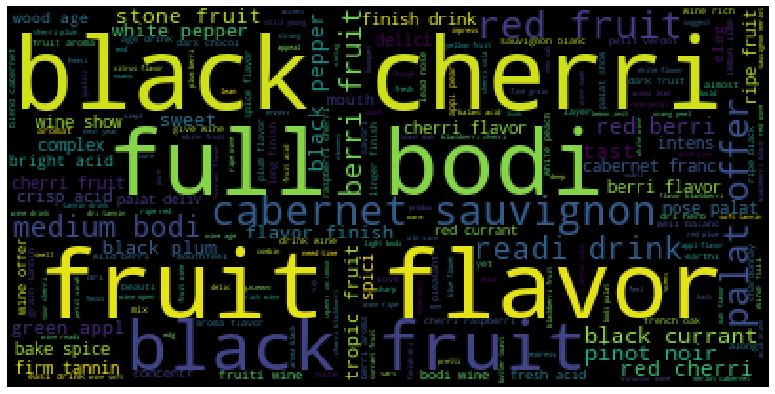

In [23]:
pr.columns = ['description', 'country', 'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

In [24]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'US']
writer.to_csv('us-wine.csv', columns = header, index=False)

lol = pd.read_csv('us-wine.csv')
lol.head(4)

,description,country,variety
0,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris
1,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling
2,"Much like the regular bottling from 2012, this...",US,Pinot Noir
3,"Soft, supple plum envelopes an oaky structure ...",US,Cabernet Sauvignon


In [25]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Italy']
writer.to_csv('italy-wine.csv', columns = header, index=False)

lol = pd.read_csv('italy-wine.csv')
lol.head(4)

,description,country,variety
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend
1,"Here's a bright, informal red that opens with ...",Italy,Frappato
2,This is dominated by oak and oak-driven aromas...,Italy,Nerello Mascalese
3,Delicate aromas recall white flower and citrus...,Italy,White Blend


In [26]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Portugal']
writer.to_csv('portugal-wine.csv', columns = header, index=False)

lol = pd.read_csv('portugal-wine.csv')
lol.head(4)

,description,country,variety
0,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red
1,"Grown on the sandy soil of Tejo, the wine is t...",Portugal,Touriga Nacional
2,"This bottling shows a rich, wood-aged wine, fu...",Portugal,Portuguese White
3,"From an estate in the south of the Alentejo, t...",Portugal,Portuguese Red


In [27]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("portugal-wine1.csv", header = None)
dmcu = pd.read_csv("us-wine1.csv", header = None)
dord = pd.read_csv("italy-wine1.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Portugal", "US", "Italia"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] File b'portugal-wine1.csv' does not exist: b'portugal-wine1.csv'